In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    # raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    # raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].bfill()
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ', 'G_MRActP', 'G_MPF', 'G_ADC4', 'F_CuttingTime', 'F_OperationTime'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat([df4,df5,df6,df7], axis=0)
data_all = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

# data['G_MP'] = data['G_MV'] * data['G_MA']
data.dropna(inplace=True)
data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 16:27:17,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:18,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:19,2,10424,0.0,0.0,712.0,21.0,37.099998,38.900002,0.0,220.960007,11.102,2.660,59.970001,45.0


In [3]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, f1_score, roc_auc_score

def verification_train(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

def verification_test(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

# def roc_auc(y, predict):
    fpr, tpr, _ = roc_curve(y, predict)
    auc = roc_auc_score(y, predict)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.text(0.5, 0.3, f'AUC = {auc:.4f}', fontsize=20)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()



def highlight_break(ax, sub_df):
    time_ranges_colors = [('00:00:00', '01:00:00', 'red'),
                          ('05:00:00', '06:00:00', 'blue'),
                          ('12:00:00', '13:00:00', 'green'), 
                          ('17:00:00', '18:00:00', 'magenta')]

    # sub_df의 모든 고유한 날짜를 가져옵니다.
    unique_dates = sub_df.index.normalize().unique()

    for start, end, color in time_ranges_colors:
        for date in unique_dates:
            # 각 날짜와 시간대를 결합하여 시작 및 종료 시간을 생성합니다.
            start_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + start)
            end_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + end)

            ax.fill_between(sub_df.index, 
                            ax.get_ylim()[0], ax.get_ylim()[1], 
                            where=(sub_df.index >= start_time) & (sub_df.index <= end_time), 
                            color=color, alpha=0.3)

def simple_plot(data, date=None, col=None):
    # col이 None인 경우 모든 열을 선택
    if col is None:
        col = data.columns

    start_time = time.time()
    plt.figure(figsize=(20, len(col)*2))

    # date가 None인 경우 전체 날짜 범위를 선택
    if date is None:
        tmp = data[col]
    elif isinstance(date, tuple):
        tmp = data.loc[date[0]:date[1], col]
    else:
        tmp = data.loc[date].copy()

    for i, column in enumerate(tmp.columns):
        ax = plt.subplot(len(tmp.columns), 1, i + 1)
        plt.plot(tmp[column])
        highlight_break(ax, tmp)

        # y축의 범위를 해당 그래프의 최소값과 최대값으로 설정
        plt.ylim(tmp[column].min(), tmp[column].max())

        mask = tmp['F_RunState'] == 2
        for x_position in tmp[mask].index:
            plt.axvline(x=x_position, color='r', alpha=0.1)
        plt.title(column)

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    print(f'소요 시간 : {(end_time - start_time):.2f} 초')

In [6]:
# 정상 데이터
data['label'] = 0

mask1 = (data.index >= pd.Timestamp('2023-06-13 15:31:06')) & (data.index <= pd.Timestamp('2023-06-13 16:40:28'))
mask2 = (data.index >= pd.Timestamp('2023-06-14 02:24:35')) & (data.index <= pd.Timestamp('2023-06-14 03:32:12'))
mask3 = (data.index >= pd.Timestamp('2023-06-05 19:35:30')) & (data.index <= pd.Timestamp('2023-06-05 20:44:09'))
mask4 = (data.index >= pd.Timestamp('2023-06-16 09:21:54')) & (data.index <= pd.Timestamp('2023-06-16 10:29:53'))
mask5 = (data.index >= pd.Timestamp('2023-06-09 06:46:59')) & (data.index <= pd.Timestamp('2023-06-09 07:57:42'))
mask5 = (data.index >= pd.Timestamp('2023-06-09 06:46:59')) & (data.index <= pd.Timestamp('2023-06-09 07:57:42'))
mask6 = (data.index >= pd.Timestamp('2023-06-28 02:51:01')) & (data.index <= pd.Timestamp('2023-06-28 04:03:40'))

mask7 = (data.index >= pd.Timestamp('2023-06-28 13:06:26')) & (data.index <= pd.Timestamp('2023-06-28 14:13:25'))
mask8 = (data.index >= pd.Timestamp('2023-06-28 20:26:31')) & (data.index <= pd.Timestamp('2023-06-28 21:31:51'))
mask8 = (data.index >= pd.Timestamp('2023-06-15 06:44:09')) & (data.index <= pd.Timestamp('2023-06-15 07:54:24'))
mask9 = (data.index >= pd.Timestamp('2023-06-15 09:09:55')) & (data.index <= pd.Timestamp('2023-06-15 10:19:56'))
mask10 = (data.index >= pd.Timestamp('2023-06-15 15:14:25')) & (data.index <= pd.Timestamp('2023-06-15 16:26:26'))
mask11 = (data.index >= pd.Timestamp('2023-06-16 21:08:05')) & (data.index <= pd.Timestamp('2023-06-16 22:21:35'))
mask12 = (data.index >= pd.Timestamp('2023-06-08 15:17:46')) & (data.index <= pd.Timestamp('2023-06-08 16:23:13'))
mask13 = (data.index >= pd.Timestamp('2023-06-21 07:26:50')) & (data.index <= pd.Timestamp('2023-06-21 08:33:53'))
mask14 = (data.index >= pd.Timestamp('2023-06-21 14:13:06')) & (data.index <= pd.Timestamp('2023-06-21 15:18:49'))
mask15 = (data.index >= pd.Timestamp('2023-06-21 03:27:31')) & (data.index <= pd.Timestamp('2023-06-21 04:34:53'))


# 두 마스크를 합침
combined_mask = mask1|mask2|mask3|mask4|mask5|mask6|mask7|mask8|mask9|mask10|mask11|mask12|mask13|mask14|mask15

selected_data = data[combined_mask]
selected_data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp,label
GDatetime,,,,,,,,,,,,,,,
2023-06-05 19:35:30,1,0,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,217.419998,11.170,2.688,59.980000,43.0,0
2023-06-05 19:35:31,1,1,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,217.419998,11.170,2.688,59.980000,43.0,0
2023-06-05 19:35:32,1,2,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,218.279999,12.793,2.840,59.980000,43.0,0
2023-06-05 19:35:33,1,3,0.0,0.0,712.0,21.0,34.700001,30.900000,0.0,217.619995,12.816,2.860,59.980000,43.0,0
2023-06-05 19:35:34,1,4,0.0,0.0,712.0,21.0,34.700001,30.900000,0.0,217.619995,12.816,2.860,59.980000,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 14:13:21,2,10426,0.0,0.0,712.0,21.0,36.400002,38.700001,0.0,213.539993,10.777,2.528,59.990002,45.0,0
2023-06-28 14:13:22,2,10426,0.0,0.0,712.0,21.0,36.500000,38.599998,0.0,213.389999,10.805,2.532,59.990002,45.0,0
2023-06-28 14:13:23,2,10426,0.0,0.0,712.0,21.0,36.500000,38.599998,0.0,213.470001,10.698,2.536,59.990002,45.0,0


In [13]:
# 이상 데이터

mask1 = (data.index >= pd.Timestamp('2023-06-22 18:57:44')) & (data.index <= pd.Timestamp('2023-06-22 19:08:12'))
mask2 = (data.index >= pd.Timestamp('2023-06-23 11:10:38')) & (data.index <= pd.Timestamp('2023-06-23 11:35:08'))
mask3 = (data.index >= pd.Timestamp('2023-06-23 14:08:55')) & (data.index <= pd.Timestamp('2023-06-23 14:20:50'))
mask4 = (data.index >= pd.Timestamp('2023-06-27 10:22:44')) & (data.index <= pd.Timestamp('2023-06-27 10:29:07'))
mask5 = (data.index >= pd.Timestamp('2023-06-29 11:11:21')) & (data.index <= pd.Timestamp('2023-06-29 11:20:20'))
mask6 = (data.index >= pd.Timestamp('2023-07-01 10:56:42')) & (data.index <= pd.Timestamp('2023-07-01 11:14:12'))

# 두 마스크를 합침
combined_mask = mask1 | mask2 | mask3 | mask4 | mask5 | mask6

data.loc[combined_mask, 'label'] = 1
anomaly = data[combined_mask]
anomaly_value = anomaly['label']
data.loc[combined_mask]
anomaly

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp,label
GDatetime,,,,,,,,,,,,,,,
2023-06-22 18:57:44,2,2441,0.0,0.0,712.0,60.0,37.099998,32.400002,0.0,216.300003,12.878,2.800,60.000000,45.0,1
2023-06-22 18:57:45,2,2441,0.0,0.0,712.0,60.0,37.099998,32.400002,0.0,215.880005,12.864,2.828,60.000000,45.0,1
2023-06-22 18:57:46,2,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,215.550003,12.727,2.776,60.000000,45.0,1
2023-06-22 18:57:47,2,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,215.130005,12.786,2.796,60.000000,45.0,1
2023-06-22 18:57:48,2,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,215.130005,12.786,2.796,60.000000,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 11:14:08,4,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,218.809998,12.664,2.768,60.009998,44.0,1
2023-07-01 11:14:09,4,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,218.809998,12.664,2.768,60.009998,44.0,1
2023-07-01 11:14:10,4,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,218.669998,12.705,2.788,60.009998,44.0,1


In [4]:
mask1 = (data.index >= pd.Timestamp('2023-06-10 08:22:29')) & (data.index <= pd.Timestamp('2023-06-12 07:31:56'))
mask2 = (data.index >= pd.Timestamp('2023-06-17 08:27:05')) & (data.index <= pd.Timestamp('2023-06-19 07:36:11'))
mask3 = (data.index >= pd.Timestamp('2023-06-24 08:17:05')) & (data.index <= pd.Timestamp('2023-06-26 07:28:32'))


# 두 마스크를 합침
combined_mask = mask1|mask2|mask3

clean_data = data[~combined_mask]
clean_data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 16:27:17,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:18,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:19,2,10424,0.0,0.0,712.0,21.0,37.099998,38.900002,0.0,220.960007,11.102,2.660,59.970001,45.0


In [10]:
data[combined_mask]

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-10 08:22:29,1,1,0.0,0.0,712.0,13.0,33.400002,37.900002,0.0,213.830002,12.699000,2.788,59.980000,42.0
2023-06-12 07:31:56,1,23,4987.0,3.0,672.0,13.0,27.500000,59.099998,0.0,217.050003,18.898001,5.396,59.980000,40.0
2023-06-17 08:27:05,1,1,0.0,0.0,712.0,13.0,33.400002,35.799999,0.0,220.750000,11.146000,2.704,59.950001,42.0
2023-06-19 07:36:11,1,31,4987.0,3.0,672.0,13.0,27.600000,52.900002,0.0,217.910004,16.517000,4.508,60.009998,41.0
2023-06-24 08:17:05,1,28,0.0,0.0,712.0,13.0,33.700001,38.299999,0.0,216.889999,12.799000,2.840,60.009998,42.0
2023-06-26 07:28:32,1,23,5217.0,4.0,672.0,13.0,27.600000,65.099998,0.0,217.470001,18.431000,5.224,59.970001,41.0


In [47]:
# df = df.reset_index()
# df = df.drop('GDatetime', axis=1)

# # F_CycleTime의 차이 계산 및 라벨링
# df['Label'] = (df['F_CycleTime'].shift(1) - df['F_CycleTime']).fillna(2)

# # 양수인 라벨의 인덱스 추출
# positive_label_indices = df[df['Label'] > 0].index

# # 구간별 라벨링
# current_label = 1
# for i in range(len(positive_label_indices)):
#     start_idx = positive_label_indices[i]
#     if i < len(positive_label_indices) - 1:
#         end_idx = positive_label_indices[i + 1]
#     else:
#         end_idx = len(df) - 1
#     df.loc[start_idx:end_idx, 'Interval_Label'] = current_label
#     current_label += 1

In [48]:
# # Find the cycles
# start_indices = df[df['Label'] > 0].index
# end_indices = start_indices[1:].append(pd.Index([len(df)]))

# # Extract sequences
# sequences = []
# for start, end in zip(start_indices, end_indices):
#     sequence = df.iloc[start:end].drop(['Label', 'Interval_Label'], axis=1).values
#     sequences.append(sequence)

# final_sequences = []
# for i in sequences:
#     if 1800 < len(i) < 7200 :
#         final_sequences.append(i)

# # Find the maximum sequence length
# max_length = max([len(seq) for seq in final_sequences])

# # Initialize an empty list to hold the padded sequences
# padded_sequences = []

# # Iterate through the sequences
# for seq in final_sequences:
#     # Calculate the required padding length
#     padding_length = max_length - len(seq)
#     # Pad the sequence with zeros
#     padded_seq = np.pad(seq, ((0, padding_length), (0, 0)), 'constant')
#     # Append the padded sequence to the list
#     padded_sequences.append(padded_seq)

# # Stack the padded sequences into a 3D numpy array
# final_data = np.stack(padded_sequences)

# # The shape of final_data will be (samples, sequences, channels)
# print(final_data.shape)

In [49]:
# # 'Interval_Label' 값별로 딕셔너리에 리스트로 저장
# label_shapes = {}

# for label in df['Interval_Label'].unique():
#     label_data = df[df['Interval_Label'] == label]
#     shape = label_data.shape
#     label_shapes[label] = shape

# # 결과 출력
# for label, shape in label_shapes.items():
#     print(f'Interval_Label {label}: Shape {shape}')

In [11]:
data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 16:27:17,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:18,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:19,2,10424,0.0,0.0,712.0,21.0,37.099998,38.900002,0.0,220.960007,11.102,2.660,59.970001,45.0


In [40]:
import plotly.graph_objects as go; import numpy as np
from plotly_resampler import register_plotly_resampler

# Call the register function once and all Figures/FigureWidgets will be wrapped
# according to the register_plotly_resampler its `mode` argument
register_plotly_resampler(mode='auto')


# auto mode: when working in an IPython environment, this will automatically be a 
# FigureWidgetResampler else, this will be an FigureResampler
f = go.Figure()
f.add_trace({"x":data.index, "y":data['F_RunState'], "name": "F_RunState"})
f.add_trace({"x":data.index, "y":data['F_CycleTime'], "name": "F_CycleTime"})
f.add_trace({"x":data.index, "y":data['G_ADC3'], "name": "G_ADC3"})
f.add_trace({"x":data.index, "y":data['F_ToolNum'], "name": 'F_ToolNum'})
f.add_trace({"x":data.index, "y":data['G_MV'], "name": "G_MV"})
f.add_trace({"x":data.index, "y":data['G_MA'], "name": "G_MA"})
f.add_trace({"x":data.index, "y":data['G_MFeq'], "name": "G_MFeq"})
f.add_trace({"x":data.index, "y":data['G_MTemp'], "name": "G_MTemp"})
f

FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> F_RunState <i style="color:#fc9944">~38m</i>',
              'type': 'scatter',
              'uid': '87965f65-99fd-4fbe-b8c5-014e3f49cba8',
              'x': array([datetime.datetime(2023, 6, 5, 7, 3, 45),
                          datetime.datetime(2023, 6, 5, 7, 22, 47),
                          datetime.datetime(2023, 6, 5, 7, 37, 6), ...,
                          datetime.datetime(2023, 7, 1, 15, 19, 54),
                          datetime.datetime(2023, 7, 1, 16, 26, 8),
                          datetime.datetime(2023, 7, 1, 16, 27, 21)], dtype=object),
              'y': array([2., 4., 1., ..., 3., 3., 1.])},
             {'name': ('<b style="color:sandybrown">[R' ... 'style="color:#fc9944">~38m</i>'),
              'type': 'scatter',
              'uid': 'c32f5023-f0a6-4384-8929-99cc950db58c',
              'x': array([datetime.datetime(2023, 6, 5, 7, 3, 45),
                          datetim

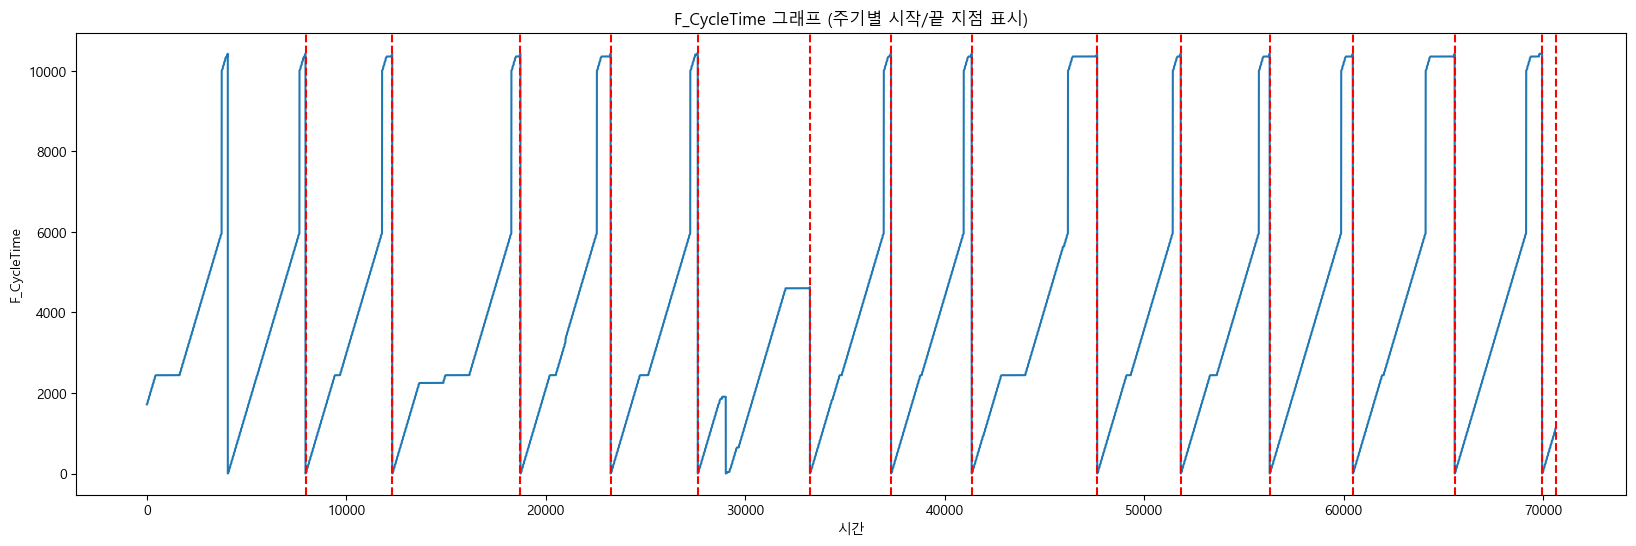

([Timestamp('2023-06-29 01:39:35'),
  Timestamp('2023-06-29 02:44:50'),
  Timestamp('2023-06-29 03:57:41'),
  Timestamp('2023-06-29 08:22:52'),
  Timestamp('2023-06-29 09:39:25')],
 [Timestamp('2023-06-29 02:44:49'),
  Timestamp('2023-06-29 03:57:40'),
  Timestamp('2023-06-29 08:22:51'),
  Timestamp('2023-06-29 09:39:24'),
  Timestamp('2023-06-29 10:52:36')])

In [48]:
def find_cycle_periods(data, threshold_low=100, threshold_high=10000, sub_cycle_threshold=1000, sub_cycle_length_minutes=50):
    cycle_starts = []
    cycle_ends = []
    in_cycle = False
    in_high = False
    in_sub_cycle = False
    label = -1 # 주기 라벨 (0부터 시작)
    
    # label 열을 추가하고 -1로 초기화
    data['label'] = 0
    sub_cycle_start_time = None
    sub_cycle_length = 0
    
    for i in range(len(data) - 1):
        value = data['F_CycleTime'].iloc[i]
        next_value = data['F_CycleTime'].iloc[i + 1]
        
        # 주기 시작 지점 찾기 (0 ~ 100 근처에서 올라가기 시작)
        if not in_cycle and value <= threshold_low:
            in_cycle = True
            label += 1 # 새로운 주기 시작, 라벨 증가
            cycle_starts.append(data.index[i]) # datetime 인덱스 사용
        
        # 주기 내부라면 현재 라벨로 표시
        if in_cycle:
            data['label'].iloc[i] = label

        # 1만 근처의 값에 도달
        if in_cycle and not in_high and value >= threshold_high:
            in_high = True

        # 1천 근처의 값에 도달
        if in_cycle and not in_high and value >= sub_cycle_threshold:
            in_sub_cycle = True
            if sub_cycle_start_time is None:
                sub_cycle_start_time = data.index[i]

        # 하위 주기의 끝 지점 찾기
        if in_sub_cycle and next_value <= threshold_low:
            sub_cycle_length += (data.index[i] - sub_cycle_start_time).seconds / 60
            sub_cycle_start_time = None
            if sub_cycle_length >= sub_cycle_length_minutes:
                in_high = True
            in_sub_cycle = False
            
        # 주기 끝 지점 찾기
        if in_high and next_value <= threshold_low:
            in_high = False
            in_cycle = False
            cycle_ends.append(data.index[i]) # datetime 인덱스 사용
            sub_cycle_length = 0
            
    # 마지막 주기의 끝 지점 처리
    if in_cycle:
        cycle_ends.append(data.index[-1])

    return cycle_starts, cycle_ends


def remove_constant_values(data, lower_bound=1000, upper_bound=12000, duration_minutes=20):
    constant_value = None
    constant_start_time = None
    rows_to_drop = []

    for i in range(len(data) - 1):
        value = data['F_CycleTime'].iloc[i]

        # 값이 범위 내에 있고 이전 값과 동일한 경우
        if lower_bound <= value < upper_bound and value == constant_value:
            if constant_start_time is None:
                constant_start_time = data.index[i]
            # 지속 시간이 20분 이상인 경우
            if (data.index[i] - constant_start_time).seconds / 60 >= duration_minutes:
                rows_to_drop.append(data.index[i])
        else:
            constant_value = value
            constant_start_time = None

    # 행 삭제
    data.drop(rows_to_drop, inplace=True)
    return data



selected_data = clean_data.loc['2023-06-29']

selected_data = remove_constant_values(selected_data)

# 중복된 인덱스를 가진 행의 평균값으로 병합
selected_data = selected_data.groupby(selected_data.index).mean()

cycle_starts, cycle_ends = find_cycle_periods(selected_data)


# selected_data의 로컬 인덱스로 변환
cycle_starts_local = [selected_data.index.get_loc(start) for start in cycle_starts]
cycle_ends_local = [selected_data.index.get_loc(end) for end in cycle_ends]



# 결과를 시각화합니다.
plt.figure(figsize=(20, 6))
plt.plot(selected_data[['F_CycleTime']].reset_index(drop=True))
for start, end in zip(cycle_starts_local, cycle_ends_local):
    # plt.axvline(x=start, color='green', linestyle='--') # 주기 시작 지점
    plt.axvline(x=end, color='red', linestyle='--') # 주기 끝 지점
plt.title('F_CycleTime 그래프 (주기별 시작/끝 지점 표시)')
plt.xlabel('시간')
plt.ylabel('F_CycleTime')
plt.show()



# 주기의 시작과 끝 지점
cycle_starts[:5], cycle_ends[:5]

In [31]:
missing_indexes = [end for end in cycle_ends if end not in selected_data.index]
print("Missing indexes:", missing_indexes)

Missing indexes: [Timestamp('2023-06-23 06:11:36'), Timestamp('2023-06-23 16:00:27'), Timestamp('2023-06-23 17:33:40'), Timestamp('2023-06-23 18:46:03'), Timestamp('2023-06-23 20:08:22'), Timestamp('2023-06-23 21:38:55'), Timestamp('2023-06-23 22:52:34')]


In [49]:
duplicated_index_values = selected_data.index[selected_data.index.duplicated()]
print("중복된 인덱스 값:", duplicated_index_values)

중복된 인덱스 값: DatetimeIndex(['2023-06-07 00:00:01', '2023-06-07 00:02:21',
               '2023-06-07 00:06:21', '2023-06-07 00:10:21',
               '2023-06-07 00:16:21', '2023-06-07 00:20:21',
               '2023-06-07 00:21:16', '2023-06-07 00:21:20',
               '2023-06-07 00:24:21', '2023-06-07 00:26:21',
               ...
               '2023-06-07 23:20:20', '2023-06-07 23:22:20',
               '2023-06-07 23:24:20', '2023-06-07 23:26:20',
               '2023-06-07 23:37:09', '2023-06-07 23:40:20',
               '2023-06-07 23:46:20', '2023-06-07 23:50:20',
               '2023-06-07 23:52:20', '2023-06-07 23:56:20'],
              dtype='datetime64[ns]', name='GDatetime', length=439, freq=None)


In [108]:
# 최대 샘플 길이를 정의 (선택적)
max_length = max(len(clean_data.loc[start:end]) for start, end in zip(cycle_starts, cycle_ends))

def create_3d_array(data, cycle_starts, cycle_ends, feature_columns=['F_CycleTime', 'F_RunState'], max_length=None):
    # 주기별 샘플을 저장할 리스트
    samples = []

    # 각 주기를 샘플로 변환
    for start, end in zip(cycle_starts, cycle_ends):
        sample = data.loc[start:end][feature_columns].values
        
        # 샘플 길이 통일 (선택적)
        if max_length:
            if len(sample) > max_length:
                sample = sample[:max_length]
            elif len(sample) < max_length:
                padding = np.zeros((max_length - len(sample), len(feature_columns)))
                sample = np.vstack((sample, padding))
        
        samples.append(sample)

    # 샘플들을 3차원 배열로 쌓기
    samples_array = np.stack(samples)
    
    return samples_array

# 3차원 배열 생성
samples_array = create_3d_array(X, cycle_starts, cycle_ends, max_length=max_length)

# 결과의 형태 출력
samples_array.shape

(364, 15833, 2)

In [16]:
# # 주기를 찾고, 시작과 끝 지점을 반환하는 수정된 함수
# def find_cycle_periods(data, threshold_low=100, threshold_high=10000):
#     cycle_starts = []
#     cycle_ends = []
#     in_cycle = False
#     in_high = False
    
#     for i in range(len(data) - 1):
#         value = data['F_CycleTime'][i]
#         next_value = data['F_CycleTime'][i + 1]
        
#         # 주기 시작 지점 찾기 (0 ~ 100 근처에서 올라가기 시작)
#         if not in_cycle and value <= threshold_low:
#             in_cycle = True
#             cycle_starts.append(i)
        
#         # 1만 근처의 값에 도달
#         if in_cycle and not in_high and value >= threshold_high:
#             in_high = True
            
#         # 1만 근처의 값에서 0 ~ 100 근처로 급격히 떨어짐 (주기 끝 지점)
#         if in_high and next_value <= threshold_low:
#             in_high = False
#             in_cycle = False
#             cycle_ends.append(i)
            
#     # 마지막 주기의 끝 지점 처리
#     if in_cycle:
#         cycle_ends.append(len(data) - 1)

#     return cycle_starts, cycle_ends

# # 주기의 시작과 끝 지점을 찾습니다.
# cycle_starts, cycle_ends = find_cycle_periods(selected_data)

# # # 결과를 시각화합니다.
# # plt.figure(figsize=(20, 6))
# # plt.plot(data['F_CycleTime'].reset_index(drop=True))
# # for start, end in zip(cycle_starts, cycle_ends):
# #     plt.axvline(x=start, color='green', linestyle='--')
# #     # plt.axvline(x=end, color='red', linestyle='--')
# # plt.title('F_CycleTime 그래프 (주기별 시작/끝 지점 표시)')
# # plt.xlabel('시간')
# # plt.ylabel('F_CycleTime')
# # plt.show()

# # 주기의 시작과 끝 지점
# cycle_starts[:5], cycle_ends[:5]

In [17]:
# def create_3d_array(data, cycle_starts, cycle_ends, feature_columns=['F_CycleTime', 'F_RunState'], max_length=None):
#     # 주기별 샘플을 저장할 리스트
#     samples = []

#     # 각 주기를 샘플로 변환
#     for start, end in zip(cycle_starts, cycle_ends):
#         sample = data.iloc[start:end + 1][feature_columns].values
        
#         # 샘플 길이 통일 (선택적)
#         if max_length:
#             if len(sample) > max_length:
#                 sample = sample[:max_length]
#             elif len(sample) < max_length:
#                 padding = np.zeros((max_length - len(sample), len(feature_columns)))
#                 sample = np.vstack((sample, padding))
        
#         samples.append(sample)

#     # 샘플들을 3차원 배열로 쌓기
#     samples_array = np.stack(samples)
    
#     return samples_array

# # 최대 샘플 길이를 정의 (선택적)
# max_length = max(end - start for start, end in zip(cycle_starts, cycle_ends))

# # 3차원 배열 생성
# samples_array = create_3d_array(data, cycle_starts, cycle_ends, max_length=max_length)

# # 결과의 형태 출력
# samples_array.shape

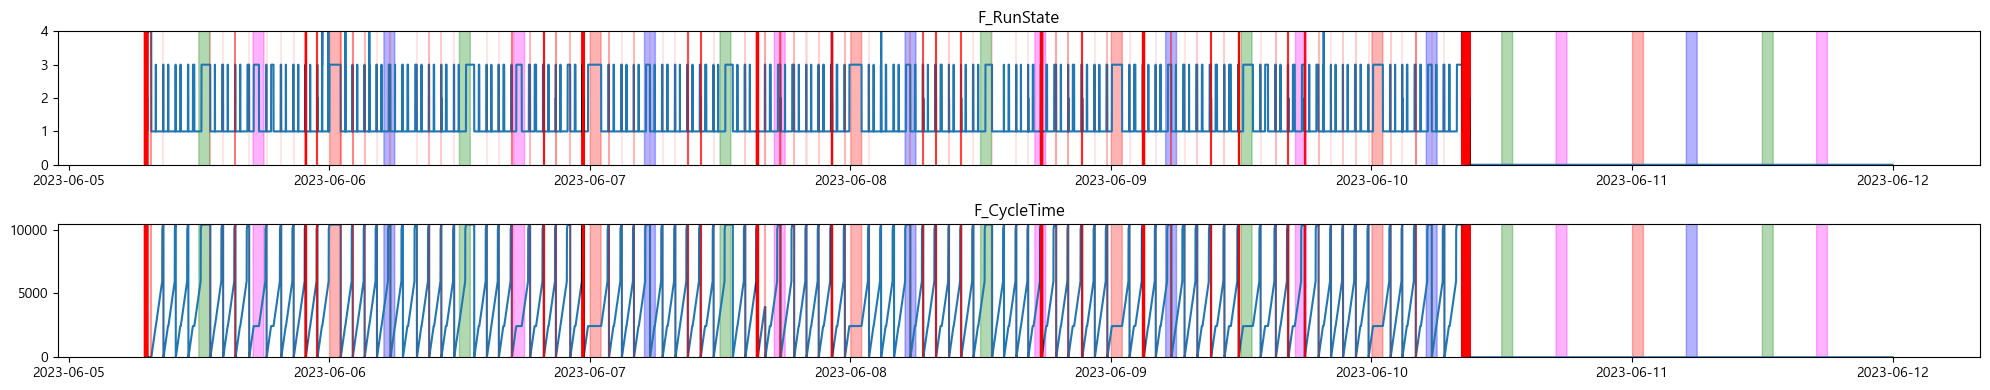

소요 시간 : 6.92 초


In [52]:
simple_plot(df4, col=['F_RunState', 'F_CycleTime'])

In [94]:
import plotly.graph_objects as go; import numpy as np
from plotly_resampler import register_plotly_resampler

# Call the register function once and all Figures/FigureWidgets will be wrapped
# according to the register_plotly_resampler its `mode` argument
register_plotly_resampler(mode='auto')


# auto mode: when working in an IPython environment, this will automatically be a 
# FigureWidgetResampler else, this will be an FigureResampler
f = go.Figure()
f.add_trace({"x":data.index, "y":data['F_RunState'], "name": "F_RunState"})
f.add_trace({"x":data.index, "y":data['F_CycleTime'], "name": "F_CycleTime"})
f.add_trace({"x":data.index, "y":data['G_ADC3'], "name": "G_ADC3"})
f.add_trace({"x":data.index, "y":data['F_ToolNum'], "name": 'F_ToolNum'})
f.add_trace({"x":data.index, "y":data['G_MV'], "name": "G_MV"})
f.add_trace({"x":data.index, "y":data['G_MA'], "name": "G_MA"})
f.add_trace({"x":data.index, "y":data['G_MFeq'], "name": "G_MFeq"})
f.add_trace({"x":data.index, "y":data['G_MTemp'], "name": "G_MTemp"})
f

FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> F_RunState <i style="color:#fc9944">~38m</i>',
              'type': 'scatter',
              'uid': '755584cb-c5a8-4037-b6ac-8aae551b19e6',
              'x': array([datetime.datetime(2023, 6, 5, 7, 3, 45),
                          datetime.datetime(2023, 6, 5, 7, 22, 47),
                          datetime.datetime(2023, 6, 5, 7, 37, 6), ...,
                          datetime.datetime(2023, 7, 1, 15, 19, 54),
                          datetime.datetime(2023, 7, 1, 16, 26, 8),
                          datetime.datetime(2023, 7, 1, 16, 27, 21)], dtype=object),
              'y': array([2., 4., 1., ..., 3., 3., 1.])},
             {'name': ('<b style="color:sandybrown">[R' ... 'style="color:#fc9944">~38m</i>'),
              'type': 'scatter',
              'uid': '404a06b3-4f52-43af-9f24-182338bd4a87',
              'x': array([datetime.datetime(2023, 6, 5, 7, 3, 45),
                          datetim

23782

In [26]:
tmp = data.loc['2023-06-26']

# 주기를 찾고, 시작과 끝 지점을 반환하는 함수
def find_cycle_periods(data, threshold_high=10000, min_distance=500):
    cycle_starts = []
    cycle_ends = []
    
    # 1만 이상의 값들을 찾습니다.
    high_points = data.index[data['F_CycleTime'] >= threshold_high]
    
    # 첫 번째 주기의 시작 지점
    cycle_starts.append(0)

    # 주기를 찾습니다.
    for i in range(1, len(high_points)):
        if high_points[i] - high_points[i - 1] >= min_distance:
            cycle_ends.append(high_points[i - 1])
            cycle_starts.append(high_points[i])

    # 마지막 주기의 끝 지점
    cycle_ends.append(high_points[-1])
    
    return cycle_starts, cycle_ends

# 주기의 시작과 끝 지점을 찾습니다.
cycle_starts, cycle_ends = find_cycle_periods(tmp)

# 결과를 시각화합니다.
plt.figure(figsize=(15, 6))
plt.plot(tmp['F_CycleTime'])
for start, end in zip(cycle_starts, cycle_ends):
    plt.axvline(x=start, color='green', linestyle='--')
    plt.axvline(x=end, color='red', linestyle='--')
plt.title('F_CycleTime 그래프 (주기별 시작/끝 지점 표시)')
plt.xlabel('시간')
plt.ylabel('F_CycleTime')
plt.show()

# 주기의 시작과 끝 지점
cycle_starts[:5], cycle_ends[:5]


TypeError: '>=' not supported between instances of 'Timedelta' and 'int'

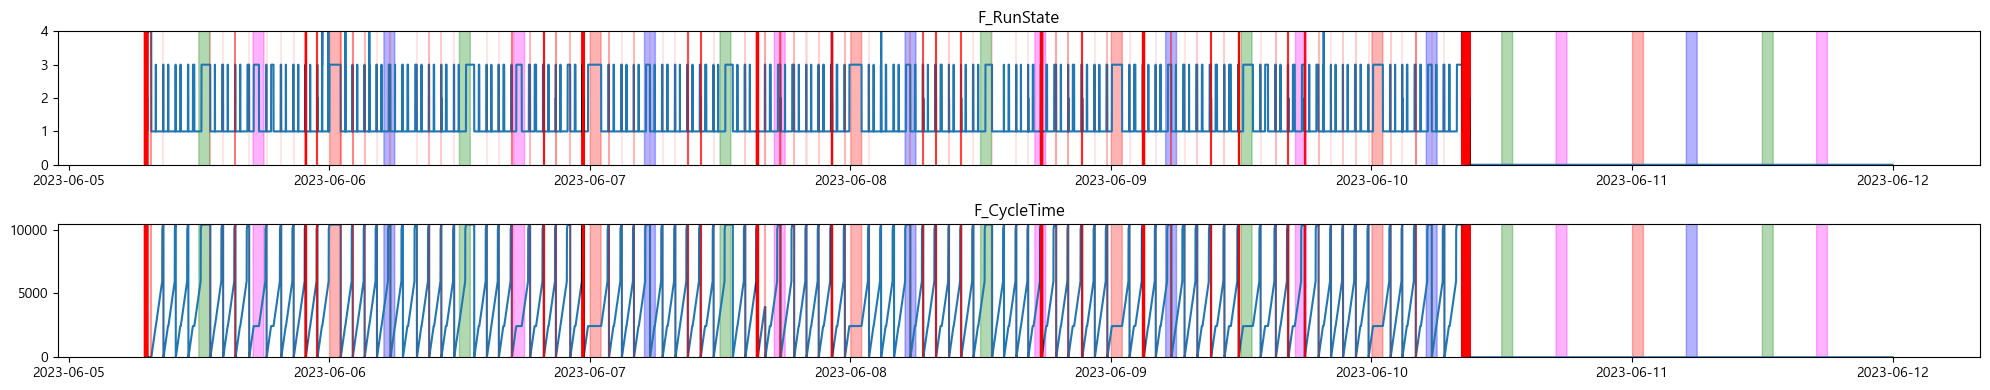

소요 시간 : 4.38 초


In [22]:
simple_plot(df4, col=['F_RunState','F_CycleTime'])

In [23]:
df4

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,13.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,13.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,13.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,13.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,13.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11 23:59:55,0,0,0.0,0.0,0.0,NaN,27.000000,57.299999,0.0,228.289993,0.063,0.004,60.020000,41.0
2023-06-11 23:59:56,0,0,0.0,0.0,0.0,NaN,27.000000,57.299999,0.0,228.289993,0.063,0.004,60.020000,41.0
2023-06-11 23:59:57,0,0,0.0,0.0,0.0,NaN,27.000000,57.299999,0.0,228.229996,0.063,0.004,60.020000,41.0
